Import Library

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt

Read Dataset

In [30]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv" ,sep=',',engine='python')
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Cek Missing Value

In [32]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Outliner

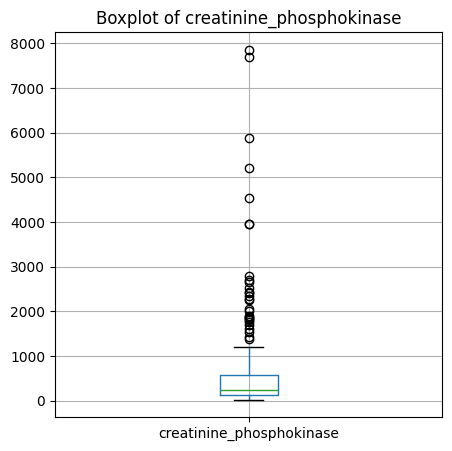

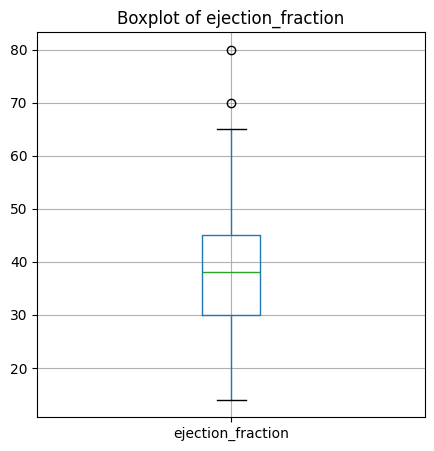

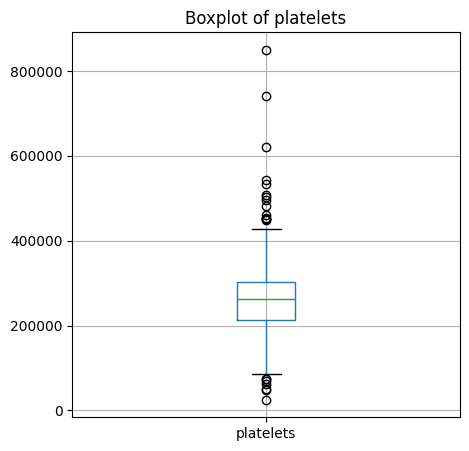

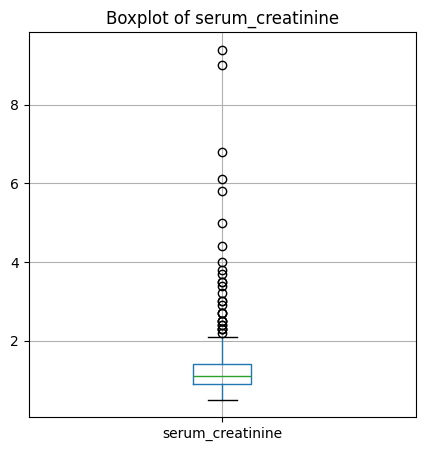

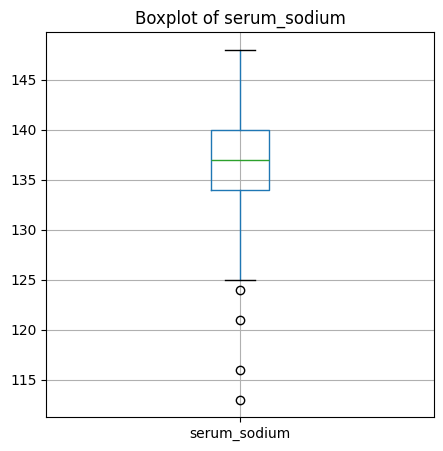

In [33]:
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for col in columns:
    plt.figure(figsize=(5, 5))
    dataset.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

(Chipping) Penanganan Outlier Pada Kolom-Kolom Numerik.

In [34]:
columnQuantile = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for column in columnQuantile:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    upperLimit = Q3 + 1.5 * IQR
    lowerLimit = Q1 - 1.5 * IQR
    
    dataset[column] = np.where(
        dataset[column] > upperLimit, upperLimit,
        np.where(dataset[column] < lowerLimit, lowerLimit, dataset[column])
    )

Menyaring baris-baris yang mengandung Outlier Pada Kolom. 

In [35]:
filteredData = dataset[
    (dataset['creatinine_phosphokinase'] < lowerLimit) | (dataset['creatinine_phosphokinase'] > upperLimit) |
    (dataset['ejection_fraction'] < lowerLimit) | (dataset['ejection_fraction'] > upperLimit) |
    (dataset['platelets'] < lowerLimit) | (dataset['platelets'] > upperLimit) |
    (dataset['serum_creatinine'] < lowerLimit) | (dataset['serum_creatinine'] > upperLimit) |
    (dataset['serum_sodium'] < lowerLimit) | (dataset['serum_sodium'] > upperLimit)
]
filteredData.shape

(299, 13)

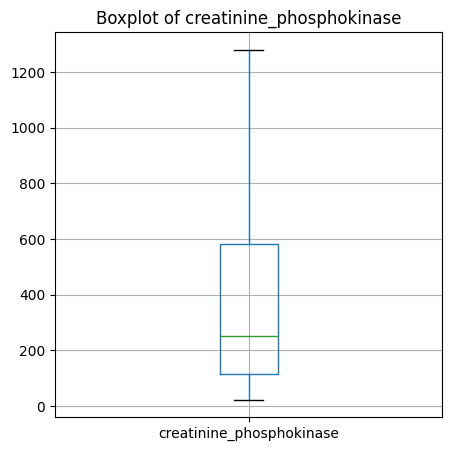

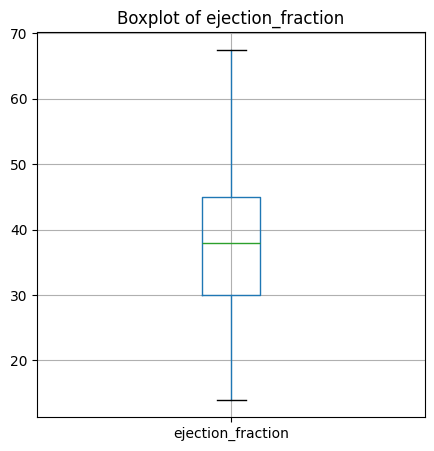

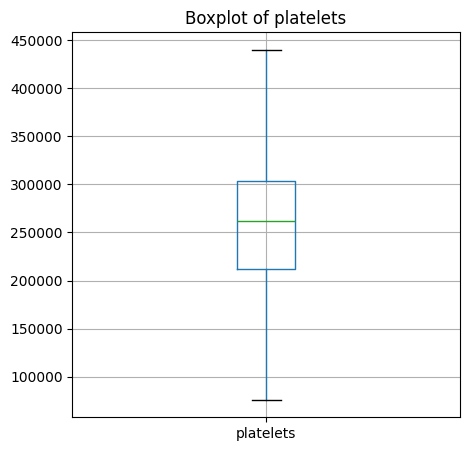

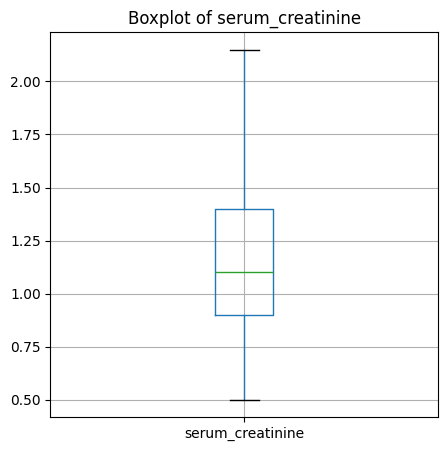

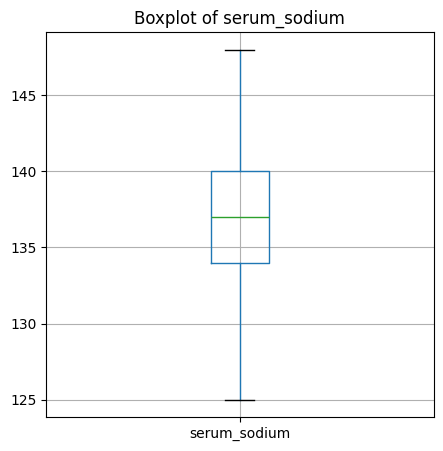

In [36]:
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for col in columns:
    plt.figure(figsize=(5, 5))
    dataset.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Pisahkan Fitur dan Target

In [37]:
x = dataset.drop('DEATH_EVENT', axis=1)
y = dataset['DEATH_EVENT']

Split Data Train/Test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)

Inisialisasi dan Latih Model Random Forest

In [39]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

Evaluasi Model

In [40]:
y_pred = random_forest.predict(x_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8833333333333333

Confusion Matrix:
 [[112  11]
 [ 10  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       123
           1       0.81      0.82      0.82        57

    accuracy                           0.88       180
   macro avg       0.86      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



Prediksi Data Baru

In [41]:
data_baru2 = pd.DataFrame([{
    "age": 50,
    "anaemia": 0,
    "creatinine_phosphokinase": 1846,
    "diabetes": 1,
    "ejection_fraction": 35,
    "high_blood_pressure": 0,
    "platelets": 263358.03,
    "serum_creatinine": 1.18,
    "serum_sodium": 137,
    "sex": 1,
    "smoking": 1,
    "time": 119
}])

hasil_prediksi2 = random_forest.predict(data_baru2)
print("Hasil Prediksi DEATH_EVENT (0=Hidup, 1=Meninggal):", hasil_prediksi2[0])


Hasil Prediksi DEATH_EVENT (0=Hidup, 1=Meninggal): 0


Save Model

In [42]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(random_forest, f)